# Resampling statistics and Bootstrapping

## Permutation Tests
Permutation tests, also called randomization or re-randomization tests, have been around for decades, but it took the advent of high-speed computers to make them practically available

### Example:
To understand the logic of a permutation test, consider the following hypothetical problem. Ten subjects have been randomly assigned to one of two treatment conditions (A or B), and an outcome variable (score) has been recorded.

![](fig1.png)

Is there enough evidence to conclude that the treatments differ in their impact?

### Parametric Approach
You might assume that the data are sampled from normal populations with equal variances and apply a two-tailed independent-groups t-test. 
> **Null hypothesis:** The population mean for Treatment A is equal to the population mean for Treatment B.

You’d calculate a t-statistic from the data and compare it to the theoretical distribution. If the observed t-statistic is sufficiently extreme, say outside the middle 95% of values in the theoretical distribution, you’d reject the null hypothesis and declare that the population means for the two groups are unequal at the 0.05 level of significance.

If the two treatments are truly equivalent, the label (Treatment A or Treatment B) assigned to an observed score is arbitrary. To test for differences between the two treatments, you could follow these steps:

1. Calculate the observed t-statistic, as in the parametric approach (t0).
2. Place all 10 scores in a single group.
3. Randomly assign 5 scores to Treatment A and 5 scores to Treatment B.
4. Calculate and record the new observed t-statistic.
5. Repeat steps 3–4 for every possible way of assigning five scores to Treatment A and five scores to Treatment B. 
6. Arrange the t-statistics in ascending order. This is the empirical distribution, based on (or conditioned on) the sample data.
7. If t0 falls outside the middle 95% of the empirical distribution, reject the null hypothesis that the population means for the two treatment groups are equal at the 0.05 level of significance.

Notice that the same t-statistic is calculated in both the permutation and parametric approaches. But instead of comparing the statistic to a theoretical distribution in order to determine if it was extreme enough to reject the null hypothesis, it’s compared to an empirical distribution created from permutations of the observed data.
> In case that the empirical distribution based on all possible permutations of the data, the permutation test is called an exact test.

Packages we need:
The coin package provides a comprehensive framework for permutation tests applied to independence problems, whereas the lmPerm package provides permutation tests for ANOVA and regression designs.

In [1]:
install.packages("coin")

package 'coin' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\Rtmp0MnHvW\downloaded_packages


In [2]:
install.packages("lmPerm")

package 'lmPerm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\Rtmp0MnHvW\downloaded_packages


In [3]:
set.seed(1234)

# Permutation tests with the coin package

Provides a general framework for applying permutation tests to independence problems. With this package, you can answer such questions as
* Are responses independent of group assignment?
* Are two numeric variables independent?
* Are two categorical variables independent?

## Syntax
```function_name( formula, data, distribution= )```

* **formula** describes the relationship among variables to be tested.
* **data** identifies a data frame.
* **distribution** specifies how the empirical distribution under the null hypothesis should be derived. Possible values are ```exact```, ```asymptotic```, and ```approximate```.
    *  "exact": the distribution under the null hypothesis is computed exactly (that is, from all possible permutations).Is only available for two-sample problems
    * "approximated": by its asymptotic distribution (distribution= "asymptotic") or via Monte Carlo resampling (distribution= "approximate(B=#)"), where # indicates the number of replications used to approximate the exact distribution.

![](fig2.png)

## Example: t-test vs. one-way permutation test for the hypothetical data


In [4]:
library(coin)

Loading required package: survival


In [5]:
score <- c(40, 57, 45, 55, 58, 57, 64, 55, 62, 65)

In [6]:
treatment <- factor(c(rep("A",5), rep("B",5)))

In [7]:
mydata <- data.frame(treatment, score)

In [8]:
t.test(score~treatment, data=mydata, var.equal=TRUE)


	Two Sample t-test

data:  score by treatment
t = -2.345, df = 8, p-value = 0.04705
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19.0405455  -0.1594545
sample estimates:
mean in group A mean in group B 
           51.0            60.6 


In [9]:
oneway_test(score~treatment, data=mydata, distribution="exact")


	Exact Two-Sample Fisher-Pitman Permutation Test

data:  score by treatment (A, B)
Z = -1.9147, p-value = 0.07143
alternative hypothesis: true mu is not equal to 0


The traditional t-test indicates a significant group difference (p < .05), whereas the exact test doesn’t (p > 0.072). With only 10 observations, you could be more inclined to trust the results of the permutation test and attempt to collect more data before reaching a final conclusion.

# Permutation tests with the ```lmPerm``` package
The ```lmPerm``` package provides support for a permutation approach to linear models. In particular, the ```lmp()``` and ```aovp()``` functions are the ```lm()``` and ```aov()``` functions modified to perform permutation tests rather than normal theory tests.

Everything is the same but you have ```perm=``` parameter.

The ```perm=``` option can take the value ```Exact```, ```Prob```, or ```SPR```: 
* **Exact** produces an exact test, based on all possible permutations.
* **Prob** samples from all possible permutations. Sampling continues until the estimated standard deviation falls below 0.1 of the estimated p-value. The stopping rule is controlled by an optional ```Ca``` parameter.
* **SPR** uses a sequential probability ratio test to decide when to stop sampling.

If the number of observations is greater than 10, ```perm="Exact"``` will automatically default to ```perm="Prob"```; exact tests are only available for small problems.

### Example: Permutation tests for simple linear regression

In [10]:
library(lmPerm)
set.seed(1234)
fit <- lmp(weight~height, data=women, perm="Prob")
summary(fit)

[1] "Settings:  unique SS : numeric variables centered"



Call:
lmp(formula = weight ~ height, data = women, perm = "Prob")

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
       Estimate Iter Pr(Prob)    
height     3.45 5000   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-Squared: 0.991,	Adjusted R-squared: 0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14 


### Example: Permutation tests for polynomial regression

In [11]:
fit <- lmp(weight~height + I(height^2), data=women, perm="Prob")
summary(fit)

[1] "Settings:  unique SS : numeric variables centered"



Call:
lmp(formula = weight ~ height + I(height^2), data = women, perm = "Prob")

Residuals:
      Min        1Q    Median        3Q       Max 
-0.509405 -0.296105 -0.009405  0.286151  0.597059 

Coefficients:
            Estimate Iter Pr(Prob)    
height      -7.34832 5000   <2e-16 ***
I(height^2)  0.08306 5000   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-Squared: 0.9995,	Adjusted R-squared: 0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16 


In [12]:
fit <- lm(weight~height + I(height^2), data=women)
summary(fit)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


### Example: Permutation test for one-way ANOVA

In [13]:
library(multcomp)

Loading required package: mvtnorm
Loading required package: TH.data
Loading required package: MASS

Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



In [14]:
fit <- aovp(response~trt, data=cholesterol, perm="Prob")
anova(fit)

[1] "Settings:  unique SS "
Analysis of Variance Table

Response: response
          Df R Sum Sq R Mean Sq Iter  Pr(Prob)    
trt        4  1351.37    337.84 5000 < 2.2e-16 ***
Residuals 45   468.75     10.42                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# Bootstrapping

* Bootstrapping generates an empirical distribution of a test statistic or set of test statistics by repeated random sampling with replacement from the original sample.
* It allows you to generate confidence intervals and test statistical hypotheses without having to assume a specific underlying theoretical distribution.

If you’re willing to assume that the sampling distribution of the mean is normally distributed, the $(\frac{1-\alpha}{2})\%$ confidence interval can be calculated using:

### $\bar{X}-t\frac{s}{\sqrt{n}}<\mu<\bar{X}+t\frac{s}{\sqrt{n}}$

where $t$ is the upper $\frac{1-\alpha}{2}$ critical value for a $t$ distribution with $n – 1$ degrees of freedom




If you aren’t willing to assume that the sampling distribution of the mean is normally distributed? You can use a bootstrapping approach instead:

1. Randomly select 10 observations from the sample, with replacement after each selection. Some observations may be selected more than once, and some may not be selected at all.
2. Calculate and record the sample mean.
3. Repeat the first two steps 1,000 times.
4. Order the 1,000 sample means from smallest to largest.
5. Find the sample means representing the 2.5th and 97.5th percentiles. In this case, it’s the 25th number from the bottom and top. These are your 95% confidence limits.

In [15]:
install.packages("boot")

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\Rtmp0MnHvW\downloaded_packages


In general, bootstrapping involves three main steps:
1. Write a function that returns the statistic or statistics of interest. If there is a single statistic (for example, a median), the function should return a number. If there is a set of statistics (for example, a set of regression coefficients), the function should return a vector.
2. Process this function through the boot() function in order to generate R bootstrap replications of the statistic(s).
3. Use the boot.ci() function to obtain confidence intervals for the statistic(s) generated in step 2.

#### ```bootobject <- boot(data=, statistic=, R=, ...)```
![](fig3.png)
The ```boot()``` function calls the statistic function ```R``` times. Each time, it generates a set of random indices, with replacement, from the integers ```1:nrow(data)```.

### bootobject()
* $t0$ -> The observed values of k statistics applied to the original data
* $t$ -> An R × k matrix, where each row is a bootstrap replicate of the k statistics

#### ```boot.ci(bootobject, conf=, type= )```
![](fig4.png)

## Example: Bootstrapping a single statistic
The mtcars dataset contains information on 32 automobiles reported in the 1974 Motor Trend magazine. Suppose you’re using multiple regression to predict miles per gallon from a car’s weight (lb/1,000) and engine displacement (cu. in.). In addition to the standard regression statistics, you’d like to obtain a 95% confidence interval for the R-squared value (the percent of variance in the response variable explained by the predictors). The confidence interval can be obtained using nonparametric bootstrapping.

The first task is to write a function for obtaining the R-squared value:

In [16]:
rsq <- function(formula, data, indices) {
d <- data[indices,]
fit <- lm(formula, data=d)
return(summary(fit)$r.square)
}

* The function returns the R-squared value from a regression.
* The ```d <- data[indices,]``` statement is required for ```boot()``` to be able to select samples.

You can then draw a large number of bootstrap replications (say, 1,000) with the following code:

In [18]:
library(boot)

In [19]:
results <- boot(data=mtcars, statistic=rsq, R=1000, formula=mpg~wt+disp)
print(results)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mtcars, statistic = rsq, R = 1000, formula = mpg ~ 
    wt + disp)


Bootstrap Statistics :
     original     bias    std. error
t1* 0.7809306 0.01109158  0.05000586


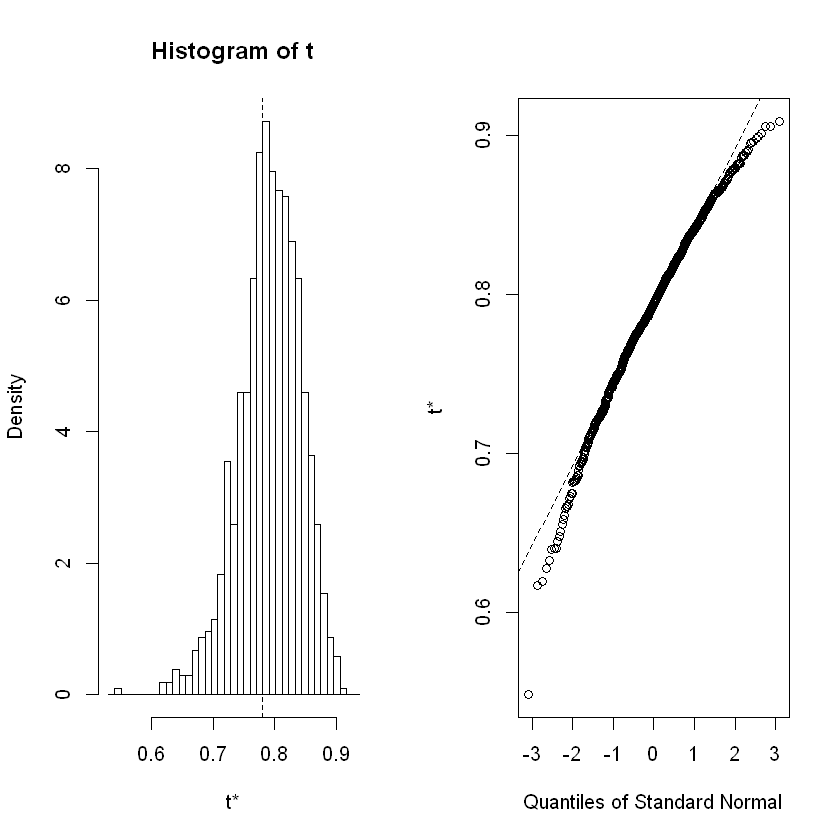

In [20]:
plot(results)

You can see that the distribution of bootstrapped R-squared values isn’t normally distributed. A 95% confidence interval for the R-squared values can be obtained using:

In [21]:
boot.ci(results, type=c("perc", "bca"))

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = c("perc", "bca"))

Intervals : 
Level     Percentile            BCa          
95%   ( 0.6828,  0.8790 )   ( 0.6389,  0.8585 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

You can see from this example that different approaches to generating the confidence intervals can lead to different intervals. In this case, the bias-adjusted interval is moderately different from the percentile method. In either case, the null hypothesis H0:
R-square = 0 would be rejected, because zero is outside the confidence limits.